Step 1:
EDA STEPS:
1.Indexing data

2.Visualize data(check the statistical data for each column)

3.Barchart/piechart(default rate in different regions, default rate in different types)

4.Attribute(numeric(correlation),rank the top 10 correlation),
EDA
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
simple histogram and distribution.

5. Correlation (with the target varaible)

Step 2:

pre-processing
missing value (impute(), delete,)
categorical varaible (onehot encoding)
outlier

Step 3:
Model:

1.Naive-Bayes

2.Logistic regression

3.Neuro Network

4.Decision tree

5. Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

6. Adaboost
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

Step 4:
Evaluate the model and compare it
cross_val_score
accuracy



In [1]:
##Thanks for Janio Alexander's code

##importing packages and data
import pandas as pd
import numpy as np
loan=pd.read_csv('/Users/taotao/Desktop/loan/loan.csv',low_memory=False)
loan_original=loan.copy()

##import packages for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

##visualize data
loan.head()
loan['loan_amnt'].sum()

13093511950.0

In [2]:
# Number of each type of column
loan.dtypes.value_counts()

float64    49
object     23
int64       2
dtype: int64

In [3]:
# select a random sample to run the analysis faster
random_sample = loan.sample( n = 10000)

In [4]:
##drop some unrelated columns 
random_sample.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

In [5]:
random_sample.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                      472
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq         5102
mths_since_last_record         8474
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        4
total_acc                   

In [6]:
# dealing with missing value
# drop columns with over 90% of null values, those variables won't help with the later analysis
random_sample = random_sample.replace([0,' ','NULL'],np.nan)
random_sample = random_sample.dropna(thresh=2000,how='any',axis=1)

In [7]:
random_sample.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   1
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                      472
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               2
earliest_cr_line                  0
inq_last_6mths                 5669
mths_since_last_delinq         5117
open_acc                          0
revol_bal                        35
revol_util                       45
total_acc                         0
initial_list_status               0
out_prncp                      2899
out_prncp_inv               

In [8]:
# for the columns with less than 90% null-value, I used different methods to fill them
# for the dates with null value, in order to do the later analysis, fill the missing data with some impossible number to help identify them later
r2 = random_sample.fillna({'last_pymnt_d':'Dec-1900','next_pymnt_d':'Dec-2100'})
# in order to keep enough variables, I decide to keep filling other null value 
random_sample=random_sample.fillna(method='ffill')

In [9]:
random_sample.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
addr_state                     0
dti                            0
earliest_cr_line               0
inq_last_6mths                 6
mths_since_last_delinq         0
open_acc                       0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      1
out_prncp_inv                  1
total_pymnt                    0
total_pymnt_inv                0
total_rec_

In [10]:
# the fillna method doesn't work for all columns
# drop some redundant features
# random_sample.drop(['mths_since_last_delinq', "total_acc", "total_rev_hi_lim","collection_recovery_fee", "out_prncp_inv","total_rec_prncp", "total_pymnt_inv","annual_inc"])

In [11]:
random_sample["loan_status"].value_counts()

Current                                                6753
Fully Paid                                             2326
Charged Off                                             536
Late (31-120 days)                                      131
Issued                                                   97
In Grace Period                                          80
Late (16-30 days)                                        28
Does not meet the credit policy. Status:Fully Paid       24
Default                                                  13
Does not meet the credit policy. Status:Charged Off      12
Name: loan_status, dtype: int64

In [12]:
# create loan_status indicator
# 1: notcurent
# 0: current and full paid
good_loan = ["Fully Paid","Issued","Does not meet the credit policy. Status:Fully Paid"] 

loan_status_ind=[]

for x in random_sample["loan_status"]:
    if x in good_loan:
        loan_status_ind.append(1)
    else:
        loan_status_ind.append(0)

random_sample["loan_status_ind"]=loan_status_ind

In [13]:
random_sample["loan_status_ind"].value_counts()

0    7553
1    2447
Name: loan_status_ind, dtype: int64

In [14]:
# Number of unique classes in each object column(check the categorical columns)
random_sample.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           4
verification_status      3
issue_d                100
loan_status             10
pymnt_plan               1
purpose                 14
addr_state              49
earliest_cr_line       513
initial_list_status      2
last_pymnt_d            79
next_pymnt_d            33
last_credit_pull_d      76
application_type         2
dtype: int64

1. grade and sub_grade is not the predictable variable, so here I just delete the grade and sub_grade column.

2. to simplify our model, I also delete the address state variable, becasue geographical factor doesn't really related to the loan condition.

3. for some varaible with too many an objects such as dates, I use some actually days to represent the variable


In [15]:
# decrease the dimension of addr_state
random_sample['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



random_sample['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


random_sample['region'] = random_sample['addr_state'].apply(finding_regions)

In [16]:
# decrease the dimension of emp_length
random_sample['emp_length'].unique()

# Make a list with each of the regions by state.

short_term=['<1 year','1 year']
mid_term=['2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10 years']
long_term=['10+ years']

random_sample['emp_length1'] = np.nan

def length(emp):
    if emp in short_term:
        return 'Short term'
    elif emp in mid_term:
        return 'Mid term'
    elif emp in long_term:
        return 'Long term'

random_sample['emp_length1'] = random_sample['emp_length'].apply(length)

In [17]:
# decrease the dimension of the object colunms
earliest_cr_line=pd.to_datetime(random_sample['earliest_cr_line'])
random_sample['today']='Jan-2016'
today=pd.to_datetime(random_sample['today'])
random_sample['credit_age']=today-earliest_cr_line

In [18]:
## transfer object to datetime
## ????should I also transfer them into months? or date is just ok
issue_d=pd.to_datetime(random_sample['issue_d'])
last_credit_pull_d=pd.to_datetime(random_sample['last_credit_pull_d'])
last_pymnt_d=pd.to_datetime(r2['last_pymnt_d'])
next_pymnt_d=pd.to_datetime(r2['next_pymnt_d'])


# clean the data
# I already create the loan_status_ind to present the good loan and bad loan, so I also deleted the original column
random_sample.drop(['grade','sub_grade','addr_state','loan_status','emp_length'],axis=1,inplace=True)

# use a different way to interpret date data
random_sample['credit_card_length']=last_credit_pull_d-issue_d
random_sample['pymnt_interval']=next_pymnt_d-last_pymnt_d


# drop the original date data to decrease the number of features
random_sample.drop(['issue_d','last_credit_pull_d','last_pymnt_d','next_pymnt_d','today','earliest_cr_line'],axis=1,inplace=True)


In [19]:
random_sample['pymnt_interval']

149339   31199 days
252314      31 days
360064   31168 days
777090   31046 days
739655      62 days
468746   42034 days
364338      31 days
642133      62 days
20997    31745 days
304177      31 days
674492       0 days
662743      31 days
205865   31137 days
643519      31 days
339713      31 days
93546       31 days
52409       31 days
752701      31 days
886306      31 days
430981      31 days
637549      31 days
815866      31 days
78480    31046 days
219774   31959 days
374224      31 days
640477      31 days
603604      62 days
529441      31 days
341075      62 days
183452   31380 days
            ...    
612855      31 days
11798    31321 days
200366   31137 days
447365   31229 days
342478      31 days
150774   31594 days
474339   42065 days
653590      31 days
842381      31 days
532113      31 days
194068   32051 days
823599      31 days
826266   31290 days
537398      31 days
854384      31 days
12933    32598 days
805054      31 days
79827       31 days
327131   31137 days


In [20]:
# change the timedelta I created to float in order to do the further analysis
random_sample['pymnt_interval']=random_sample['pymnt_interval'].astype('timedelta64[D]')
random_sample['credit_age']=random_sample['credit_age'].astype('timedelta64[D]')
random_sample['credit_card_length']=random_sample['credit_card_length'].astype('timedelta64[D]')

In [21]:
# Because I fill the missing value of last payment day and next payment day with impossible numbers
# I identified those impossible numbers as missing value again.
pymnt_interval2=random_sample['pymnt_interval']
pymnt_interval2.where(pymnt_interval2>100,31)
random_sample['pymnt_interval']=pymnt_interval2

In [22]:
random_sample.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                    2
home_ownership          4
verification_status     3
pymnt_plan              1
purpose                14
initial_list_status     2
application_type        2
region                  5
emp_length1             3
dtype: int64

In [23]:
## Encoding Catergorical variables
# one-hot encoding of categorical variables
random_sample2 = pd.get_dummies(random_sample)

In [24]:
random_sample2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 149339 to 228642
Data columns (total 64 columns):
loan_amnt                              10000 non-null float64
funded_amnt                            10000 non-null float64
funded_amnt_inv                        10000 non-null float64
int_rate                               10000 non-null float64
installment                            10000 non-null float64
annual_inc                             10000 non-null float64
dti                                    10000 non-null float64
inq_last_6mths                         9994 non-null float64
mths_since_last_delinq                 10000 non-null float64
open_acc                               10000 non-null float64
revol_bal                              10000 non-null float64
revol_util                             10000 non-null float64
total_acc                              10000 non-null float64
out_prncp                              9999 non-null float64
out_prncp_inv      

In [25]:
 # Find correlations with the target and sort
correlations = random_sample2.corr()['loan_status_ind'].sort_values(ascending=True)

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 inq_last_6mths                      0.039405
region_West                         0.045700
purpose_wedding                     0.066595
verification_status_Not Verified    0.068036
term_ 36 months                     0.122097
initial_list_status_f               0.207611
credit_card_length                  0.386551
total_pymnt_inv                     0.508707
total_pymnt                         0.511685
total_rec_prncp                     0.603214
last_pymnt_amnt                     0.627279
pymnt_interval                      0.825101
loan_status_ind                     1.000000
policy_code                              NaN
pymnt_plan_n                             NaN
Name: loan_status_ind, dtype: float64

Most Negative Correlations:
 initial_list_status_w                 -0.207611
dti                                   -0.123488
term_ 60 months                       -0.122097
funded_amnt_inv                       -0.099074
verification_status_Source Verified 

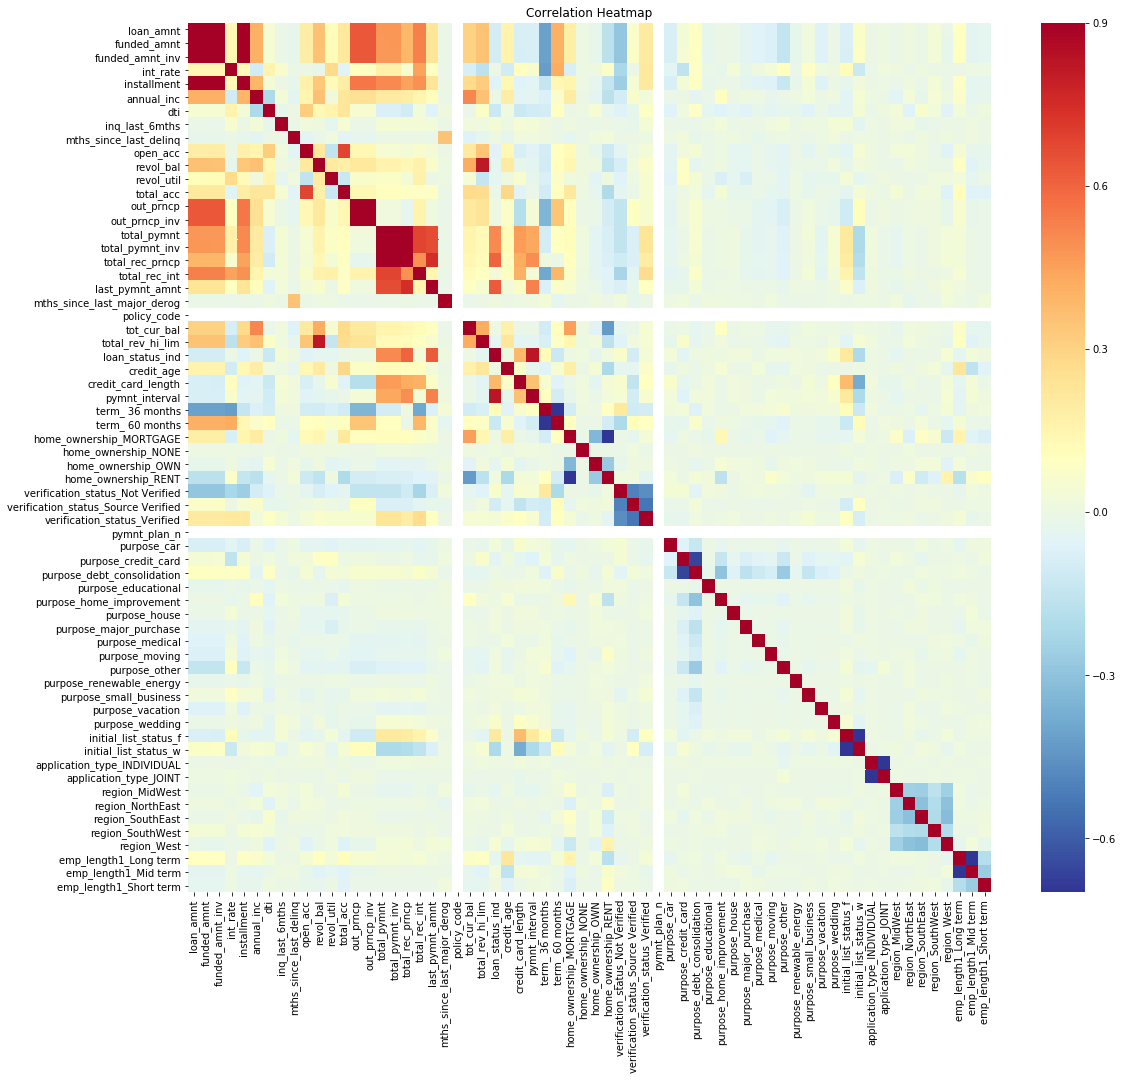

In [26]:
plt.figure(figsize = (18, 16))
random_sample_corr= random_sample2.corr()
# Heatmap of correlations
sns.heatmap(random_sample_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.7, annot = False, vmax = 0.9)
plt.title('Correlation Heatmap');